# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [2]:
dataset = pd.read_csv("Google-Playstore.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
dataset.shape

(2312944, 24)

In [5]:
dataset.head(2)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35


In [6]:
dataset.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [7]:
dataset.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [8]:
dataset.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

# EDA and Visualization

## Plotting the missing null values

Text(0.5, 1.0, 'Missing Null Values')

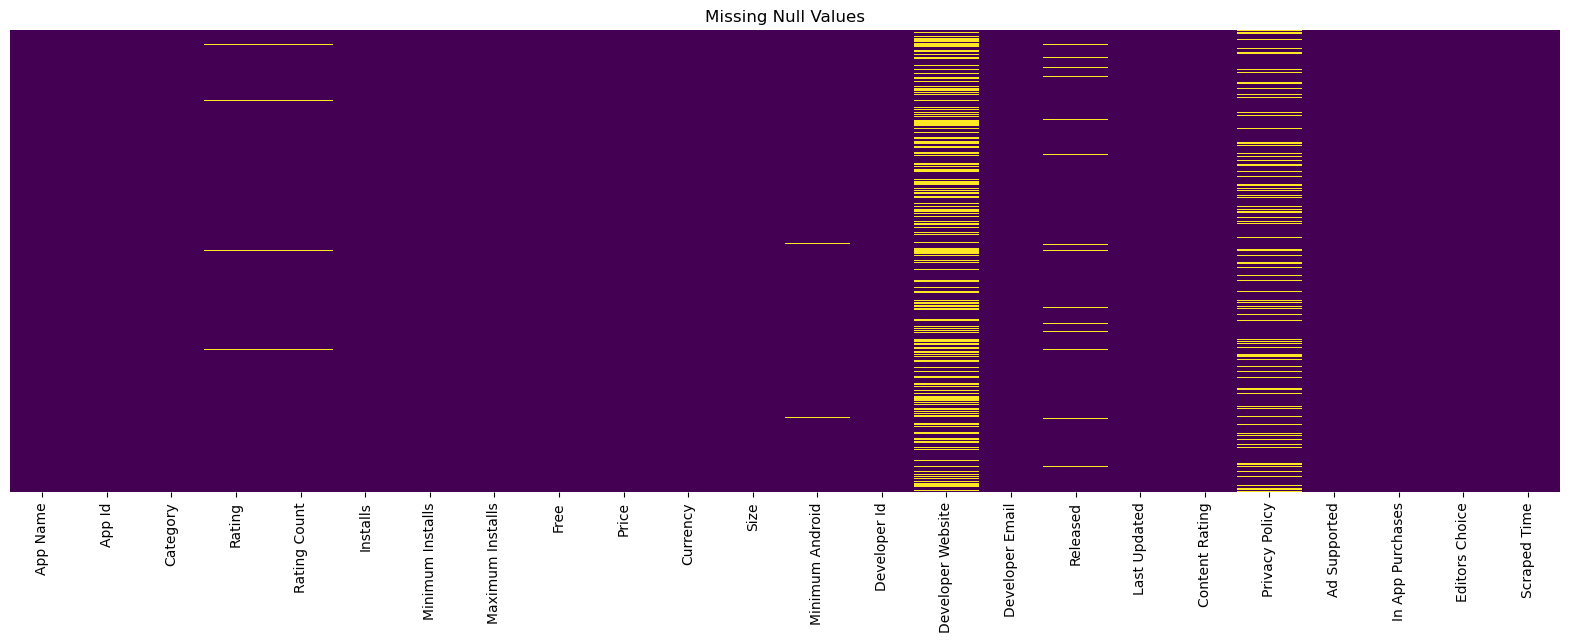

In [9]:
plt.rcParams["figure.figsize"] = (20, 6)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Missing Null Values")

In [10]:
# Missing Percentage in data
missing_percentage = dataset.isnull().sum().sort_values(ascending=False)/len(dataset)
missing_percentage

Developer Website    0.328947
Privacy Policy       0.181999
Released             0.030720
Rating               0.009893
Rating Count         0.009893
Minimum Android      0.002823
Size                 0.000085
Currency             0.000058
Installs             0.000046
Minimum Installs     0.000046
Developer Id         0.000014
Developer Email      0.000013
App Name             0.000002
App Id               0.000000
Price                0.000000
Free                 0.000000
Maximum Installs     0.000000
Last Updated         0.000000
Content Rating       0.000000
Category             0.000000
Ad Supported         0.000000
In App Purchases     0.000000
Editors Choice       0.000000
Scraped Time         0.000000
dtype: float64

## Plotting the missing percentage of null values

Text(0.5, 1.0, 'Missing Percentage of null values')

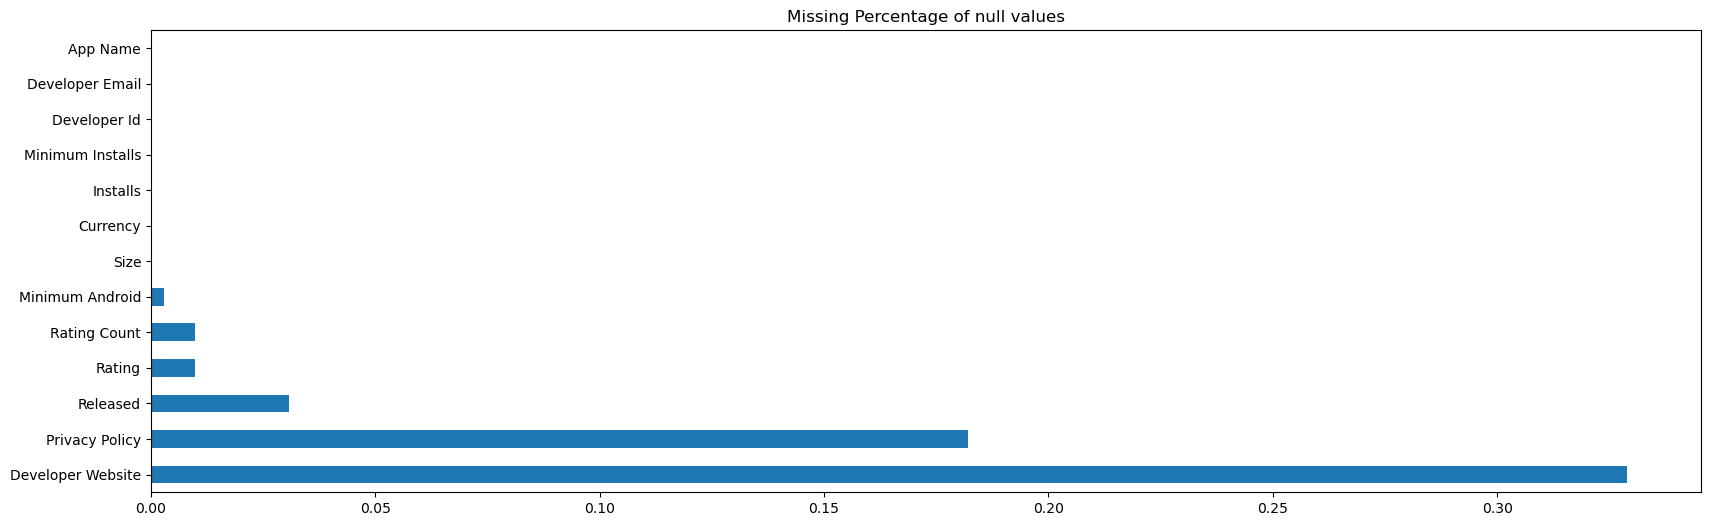

In [11]:
missing_percentage = missing_percentage[missing_percentage!=0]
plt.rcParams["figure.figsize"] = (20, 6)
missing_percentage.plot(kind="barh")
plt.title("Missing Percentage of null values")

## Observation

Dealing with the null values

1. The columns having the maximum null values are Developer Website and Privacy Policy. These two are not that helpful so we will drop these columns.

2.We can drop the small null values for the columns Size, Currency, Installs, Minimum Installs, Developer ID, Developer Email.

3. Rating, Rating Count, Released are important column so it is good to fill the null values

## Dropping the null values

In [12]:
dataset.dropna(subset=["App Name", "Size", "Currency", "Installs", "Minimum Installs", "Developer Id", "Developer Email"], inplace=True)

In [13]:
dataset.isnull().sum()

App Name                  0
App Id                    0
Category                  0
Rating                22572
Rating Count          22572
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                      0
Minimum Android        6530
Developer Id              0
Developer Website    760713
Developer Email           0
Released              70748
Last Updated              0
Content Rating            0
Privacy Policy       420843
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

## Cleaning each row

In [14]:
#Checking for duplicates
boolean = dataset["App Name"].duplicated().any()
boolean

True

In [15]:
dataset["App Name"].value_counts()

App Name
Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: count, Length: 2177592, dtype: int64

From the above cell output we can see that App Name column has multiple rows. Let's check that data in those rows is identical or not

In [16]:
dataset[dataset["App Name"] == "Tic Tac Toe"]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
3918,Tic Tac Toe,com.dev.atte.tic_tac_toe,Puzzle,0.0,0.0,10+,10.0,30,True,0.0,...,https://ne2ad32ee.app-ads-txt.com,dev.atte.francois@gmail.com,"May 18, 2018","May 18, 2018",Everyone,NaN,True,False,False,2021-06-15 20:23:22
13758,Tic Tac Toe,com.md.tictactoe,Board,0.0,0.0,10+,10.0,31,True,0.0,...,NaN,msms.zaman@gmail.com,"Nov 2, 2020","Nov 18, 2020",Everyone,https://smartdailytools.blogspot.com/2020/09/p...,True,False,False,2021-06-15 20:32:58
25351,Tic Tac Toe,com.sthirumuru.tictactoenew,Board,4.2,11.0,"5,000+",5000.0,6379,True,0.0,...,NaN,sundeep.thirumuru@gmail.com,"Apr 13, 2021","Jun 03, 2021",Everyone,NaN,True,False,False,2021-06-15 20:44:27
28142,Tic Tac Toe,com.fsk00x.TicTacToe,Board,0.0,0.0,500+,500.0,922,True,0.0,...,NaN,devmethyl@outlook.com,"Feb 13, 2020","Feb 13, 2020",Everyone,NaN,True,False,False,2021-06-15 20:47:17
30962,Tic Tac Toe,net.snatchdreams.tictactoe,Puzzle,0.0,0.0,10+,10.0,38,True,0.0,...,https://www.snatchdreams.net,snatchdreams@gmail.com,"Jul 16, 2017","Oct 16, 2019",Everyone,https://www.snatchdreams.net/privacy/tic-tac-toe/,True,False,False,2021-06-15 20:50:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272773,Tic Tac Toe,com.tictactoe.MobileAppsPro,Board,3.8,9269.0,"500,000+",500000.0,800662,True,0.0,...,NaN,smartyka@gmail.com,"Jan 9, 2015","May 20, 2015",Everyone,http://mobileappspro.yolasite.com,True,False,False,2021-06-16 12:23:56
2281376,Tic Tac Toe,com.erjainam.tictactoe.release,Board,0.0,0.0,50+,50.0,50,True,0.0,...,https://erjainam.com,engineerjainam@gmail.com,"Sep 2, 2018","Sep 02, 2018",Everyone,https://docs.google.com/document/d/1Tyi5D3VxZu...,True,False,False,2021-06-16 12:31:30
2282023,Tic Tac Toe,com.swapworld.tic_tac_toe,Board,4.7,7.0,10+,10.0,34,True,0.0,...,http://prudhvikchirunomula.pythonanywhere.com/,prudhvik.1996@gmail.com,"Sep 4, 2019","Sep 17, 2019",Everyone,NaN,False,False,False,2021-06-16 12:32:05
2299121,Tic Tac Toe,com.infuse.tictactoe,Board,4.8,20.0,100+,100.0,462,True,0.0,...,http://www.infuseapps.com,infuseandroidapps@gmail.com,"Jan 18, 2015","Jan 18, 2015",Everyone,NaN,True,False,False,2021-06-16 12:47:11


In [17]:
dataset["App Id"].duplicated().any()

False

In [18]:
dataset["App Id"].value_counts()

App Id
com.ishakwe.gakondo                    1
com.walterscazzosi.favorkout           1
com.app.p2631ED                        1
com.myhomebuy                          1
com.apocalipseescatologia.app          1
                                      ..
id.compro.virtualcompetition           1
com.fitivity.basketball_point_guard    1
smartgr.gardenshower.ideas             1
com.euroland.mobiletools.ae_nbad       1
com.yyazilim.biliyormusun              1
Name: count, Length: 2312545, dtype: int64

We have the Apps with the same names but with the unique App IDs so the Apps are different based on the App IDs

## Exploring the Numerical Columns

In [19]:
dataset["Installs"].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

### It is an object type, we need to change it into int type

In [20]:
#Removes the + Symbol
dataset["Installs"] = dataset["Installs"].str.split("+").str[0]

#Replaces the commas "," in the install column
dataset["Installs"].replace(",", "", regex=True, inplace=True)

#Converting it into int type
dataset["Installs"] = dataset["Installs"].astype("Int64")


In [21]:
dataset["Installs"].unique()

<IntegerArray>
[         10,        5000,          50,         100,        1000,         500,
       50000,       10000,           1,      500000,      100000,           5,
    10000000,     1000000,     5000000,           0,   100000000,    50000000,
  1000000000,   500000000,  5000000000, 10000000000]
Length: 22, dtype: Int64

In [22]:
dataset["Currency"].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [23]:
dataset["Size"].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

### The Size of data can be in GB, MB or KB so let's convert the data into the size in MB

In [24]:
dataset["Size"] = dataset["Size"].apply(lambda x: str(x).replace("M", "") if "M" in str(x) else x)

In [25]:
#dataset["Size"] = dataset["Size"].apply(lambda x: float(str(x).replace("k", "")) / 1000 if "k" in str(x) else x)

### Here we get a mismatched value with the data we got the value 1018. We can drop it or we can assume as it may be a "."(dot) that was incorrectly added to the dataset. So let's assume it as a dot for now and replace the "," with the dot "."

In [26]:
dataset["Size"] = dataset["Size"].apply(lambda x: str(x).replace(",", ".") if "," in str(x) else x)

### Conversion of Kbps to MB

In [27]:
dataset["Size"] = dataset["Size"].apply(lambda x: float(str(x).replace("k", ""))/1000 if "k" in str(x) else(x))

In [28]:
#dataset["Size"] = dataset["Size"].apply(lambda x: float(x))

### We get another mismatch value in the dataset which is "Varies with device" it means the size of the App varies with the device --> but here I am assuming it as 0

In [29]:
dataset["Size"] = dataset["Size"].apply(lambda x: str(x).replace("Varies with device", "0") if "Varies with device" in str(x) else(x))

In [30]:
#dataset["Size"] = dataset["Size"].apply(lambda x: float(x))

### Conversion of data Gbps to Mb

In [31]:
dataset["Size"] = dataset["Size"].apply(lambda x: float(str(x).replace("G", ""))*1000 if "G" in str(x) else x)

In [32]:
dataset["Size"] = dataset["Size"].apply(lambda x: float(x))

In [33]:
dataset.dtypes["Size"]

dtype('float64')

In [34]:
dataset["Minimum Android"]

0            7.1 and up
1            5.0 and up
2          4.0.3 and up
3          4.0.3 and up
4            4.1 and up
               ...     
2312939      4.1 and up
2312940      4.1 and up
2312941      5.0 and up
2312942      5.0 and up
2312943      5.0 and up
Name: Minimum Android, Length: 2312545, dtype: object

In [35]:
dataset["Content Rating"]

0          Everyone
1          Everyone
2          Everyone
3          Everyone
4          Everyone
             ...   
2312939        Teen
2312940    Everyone
2312941    Everyone
2312942    Everyone
2312943    Everyone
Name: Content Rating, Length: 2312545, dtype: object

In [36]:
dataset["Released"]

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312939             NaN
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: Released, Length: 2312545, dtype: object

In [37]:
dataset["Last Updated"]

0          Feb 26, 2020
1          May 06, 2021
2          Aug 19, 2019
3          Oct 13, 2018
4          Nov 12, 2018
               ...     
2312939    Jun 01, 2021
2312940    Feb 02, 2018
2312941    Aug 19, 2018
2312942    May 05, 2021
2312943    Aug 19, 2019
Name: Last Updated, Length: 2312545, dtype: object

In [38]:
dataset["Privacy Policy"]

0                         https://beniyizibyose.tk/projects/
1          https://dev4phones.wordpress.com/licencia-de-uso/
2          https://www.vietnamairlines.com/vn/en/terms-an...
3                                                        NaN
4                                http://www.horodyski.com.pl
                                 ...                        
2312939               http://a.4399sy.com.hk/user/aggreement
2312940      http://www.oru.edu/about-oru/privacy-policy.php
2312941    https://appoworld.000webhostapp.com/datastruct...
2312942    https://docs.google.com/document/d/1x-9reZuLRX...
2312943    https://biliyor-musun-sons.flycricket.io/priva...
Name: Privacy Policy, Length: 2312545, dtype: object

In [39]:
dataset["Scraped Time"]

0          2021-06-15 20:19:35
1          2021-06-15 20:19:35
2          2021-06-15 20:19:35
3          2021-06-15 20:19:35
4          2021-06-15 20:19:35
                  ...         
2312939    2021-06-16 12:59:18
2312940    2021-06-16 12:59:19
2312941    2021-06-16 12:59:19
2312942    2021-06-16 12:59:19
2312943    2021-06-16 12:59:19
Name: Scraped Time, Length: 2312545, dtype: object

In [40]:
dataset["Free"]

0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312545, dtype: bool

### Creating the column type for Free and Paid Apps by using the Free Column, it's helpful while dealing with the Paid and Free Apps

In [41]:
dataset["Type"] = np.where(dataset["Free"] == True, "Free", "paid")
dataset.drop(["Free"], axis=1, inplace=True)

### Let's Clean the Content Rating Column

In [42]:
dataset["Content Rating"].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [43]:
dataset["Content Rating"].value_counts()

Content Rating
Everyone           2021785
Teen                196311
Mature 17+           60278
Everyone 10+         33881
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

## Observation: 
1. We have various Categories in the content Rating Column: Everyone, Teen, Mature 17+, Everyone 10+, Unrated, Adults Only 18+
Now, we make this categories to a simple 3 categories for better understanding: Everyone, Teen, Adults
Mature 17+ ----> To Adults, Everyone 10+ ----> To Teen, Unrated ----> To Everyone, Adults only 18+ ----> To Adults

In [44]:
dataset["Content Rating"] = dataset["Content Rating"].replace("Unrated", "Everyone")
dataset["Content Rating"] = dataset["Content Rating"].replace("Everyone 10+", "Teen")
dataset["Content Rating"] = dataset["Content Rating"].replace("Mature 17+", "Adults")
dataset["Content Rating"] = dataset["Content Rating"].replace("Adults Only 18+", "Adults")

In [45]:
dataset["Content Rating"].unique()

array(['Everyone', 'Teen', 'Adults', 'Adults only 18+'], dtype=object)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312545 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           Int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               float64
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
dtypes: Int64(1), bool(3), float64(5), int64(1), object(14)


In [47]:
dataset["Rating"].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [48]:
dataset["Rating Count"].max()

138557570.0

In [49]:
dataset["Rating Type"] = "NoRatingProvided"
dataset.loc[(dataset["Rating Count"] > 0) & (dataset["Rating Count"] <= 10000.0), "Rating Type"] = "Less than 10K"
dataset.loc[(dataset["Rating Count"] > 10000) & (dataset["Rating Count"] <= 500000.0), "Rating Type"] = "Between 10K and 500K"
dataset.loc[(dataset["Rating Count"] > 500000) & (dataset["Rating Count"] <= 138557570.0), "Rating Type"] = "More than 500K"
dataset["Rating Type"].value_counts()

Rating Type
Less than 10K           1192798
NoRatingProvided        1082303
Between 10K and 500K      35779
More than 500K             1665
Name: count, dtype: int64

In [50]:
dataset["Rating Type"]

0              NoRatingProvided
1                 Less than 10K
2              NoRatingProvided
3                 Less than 10K
4              NoRatingProvided
                   ...         
2312939    Between 10K and 500K
2312940        NoRatingProvided
2312941        NoRatingProvided
2312942           Less than 10K
2312943           Less than 10K
Name: Rating Type, Length: 2312545, dtype: object

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312545 entries, 0 to 2312943
Data columns (total 25 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           Int64  
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Price              float64
 9   Currency           object 
 10  Size               float64
 11  Minimum Android    object 
 12  Developer Id       object 
 13  Developer Website  object 
 14  Developer Email    object 
 15  Released           object 
 16  Last Updated       object 
 17  Content Rating     object 
 18  Privacy Policy     object 
 19  Ad Supported       bool   
 20  In App Purchases   bool   
 21  Editors Choice     bool   
 22  Scraped Time       object 
 23  Type               object 
 24  Rating Type        object 
dtypes: Int64(1), bool(3), f

# Question and Answers:

* What are the Top 10 Categories that are installed from the Google Play Store?
* Which are the Categories that are getting installed the most in top 10 categories?
* What is the highest rated Category?
* Which Category has the highest Paid and Free Apps?
* How does the size of the Application impacts the Installation?
* What are the Top 5 Paid Apps based with the Highest Ratings and Installs?
* What are the Top 5 Free Apps based with the Highest Ratings and Installs?

## Q - What are the Top 10 Categories that are installed from the Google Play Store?

In [52]:
dataset["Category"].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [53]:
top_Category = dataset.Category.value_counts().reset_index().rename(columns={'Category':'Category','index':'Category'})

In [54]:
top_Category

,Category,count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138259
5,Lifestyle,118321
6,Books & Reference,116716
7,Personalization,89207
8,Health & Fitness,83497
9,Productivity,79681


In [55]:
category_Installs = dataset.groupby(["Category"])[["Installs"]].sum()

In [56]:
category_Installs

,Installs
Category,
Action,17399855328
Adventure,5390108856
Arcade,14501230845
Art & Design,1116398902
Auto & Vehicles,1594745418
Beauty,404328787
Board,3290826164
Books & Reference,4819175179
Business,5236661902


In [57]:
print(top_Category.columns)
print(category_Installs.columns)

Index(['Category', 'count'], dtype='object')
Index(['Installs'], dtype='object')


In [58]:
top_Category_installs = pd.merge(top_Category, category_Installs, on="Category")
top_Category_installs.head(5)

,Category,count,Installs
0,Education,241068,5983815847
1,Music & Audio,154897,14239401798
2,Tools,143971,71440271217
3,Business,143749,5236661902
4,Entertainment,138259,17108396833


In [59]:
top_10_Categories_installs = top_Category_installs.head(10).sort_values(by=["Installs"], ascending=False)

<Axes: title={'center': 'Top 10 Installed Categories'}, xlabel='Category', ylabel='Installs'>

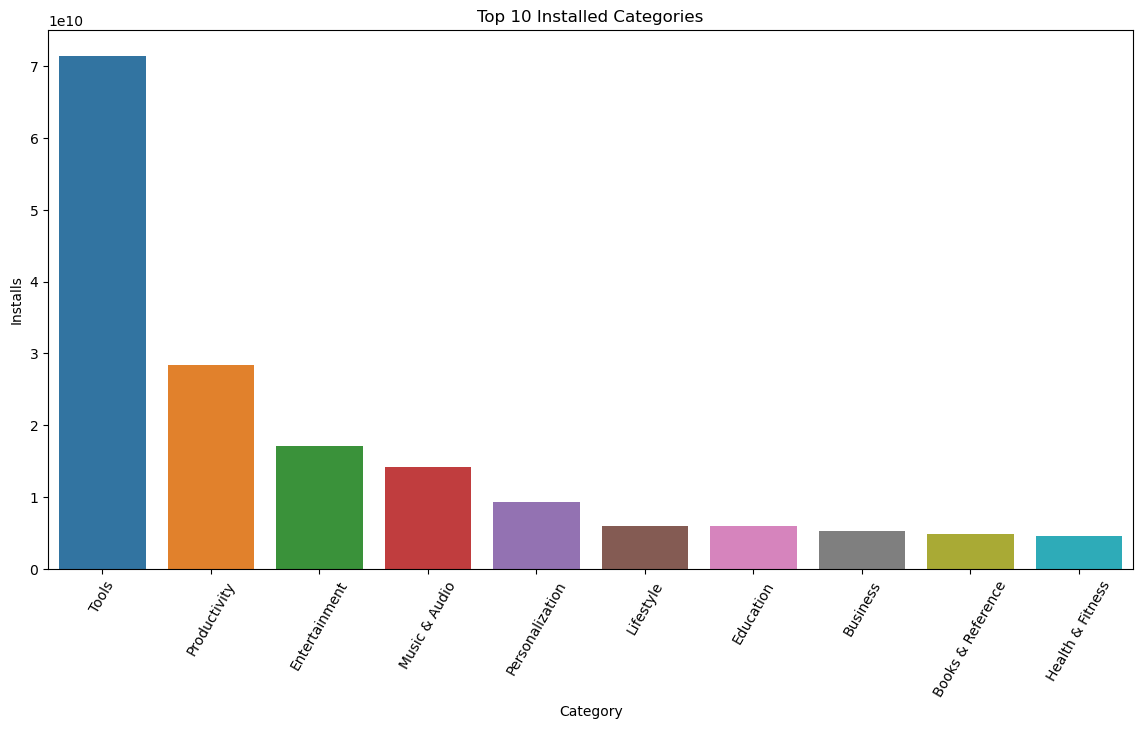

In [60]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of Applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_Categories_installs.Category, y = top_10_Categories_installs.Installs)

## Answer: 
Tools, Productivity, Entertainment, Music & Audio, Personalization, Lifestyle, Education, Business, Books & Reference, Health & Fitness

## Q - What are the Top 10 Categories in Playstore as per the count?

### Visualizing Total Categories and the Count of Apps in each Category

### Visualizing Total Categories and Installed Applications in each category

<Axes: title={'center': 'Total Categories and Installation of Applications in each category'}, xlabel='Category', ylabel='Installs'>

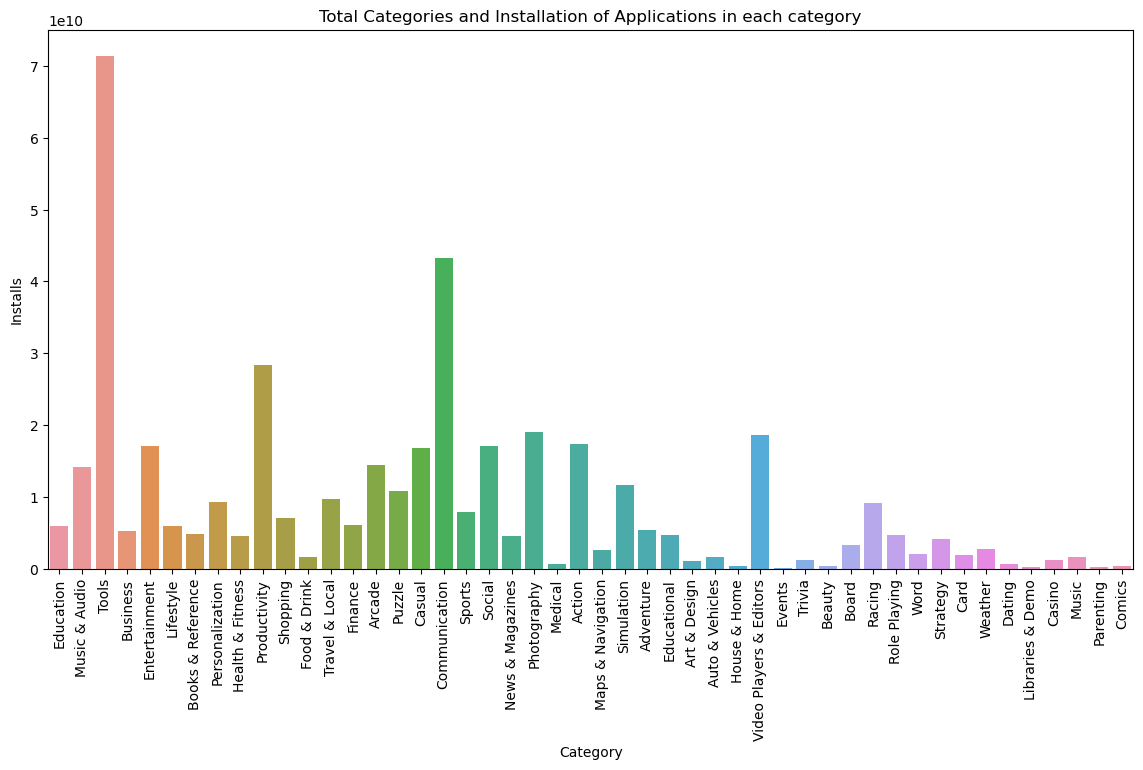

In [61]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Applications")
plt.title("Total Categories and Installation of Applications in each category")
sns.barplot(x = top_Category_installs.Category, y=top_Category_installs.Installs)

### Rating Distribution

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Rating')

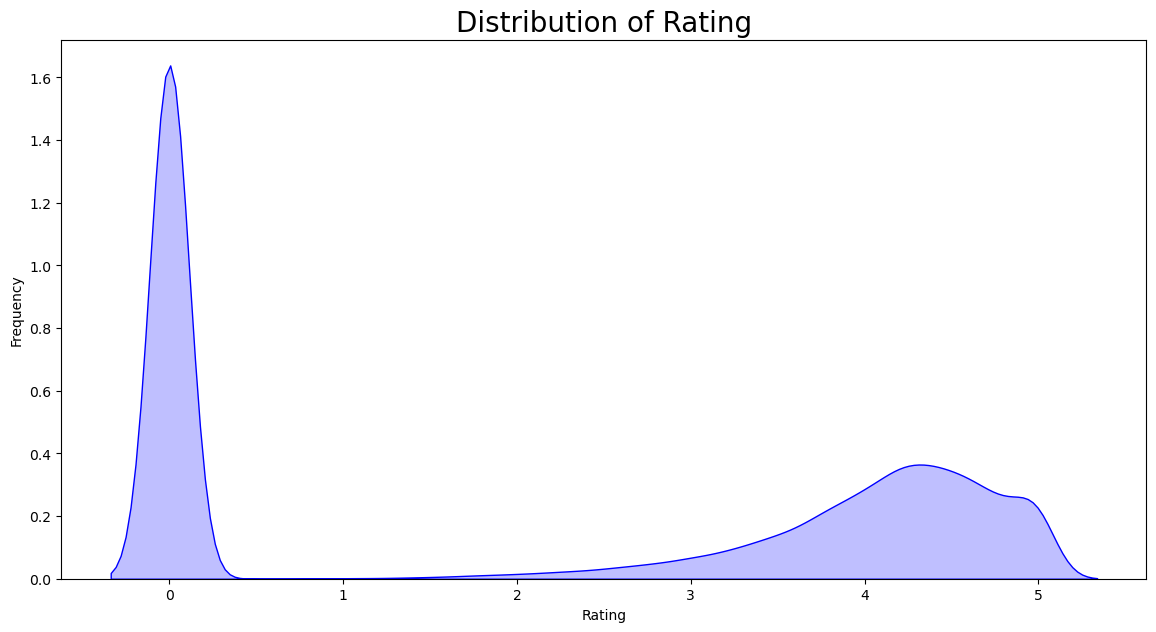

In [62]:
plt.figure(figsize=(14, 7))
g = sns.kdeplot(dataset.Rating, color="Blue", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title("Distribution of Rating", size = 20)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Rating'}, xlabel='Rating', ylabel='Count'>

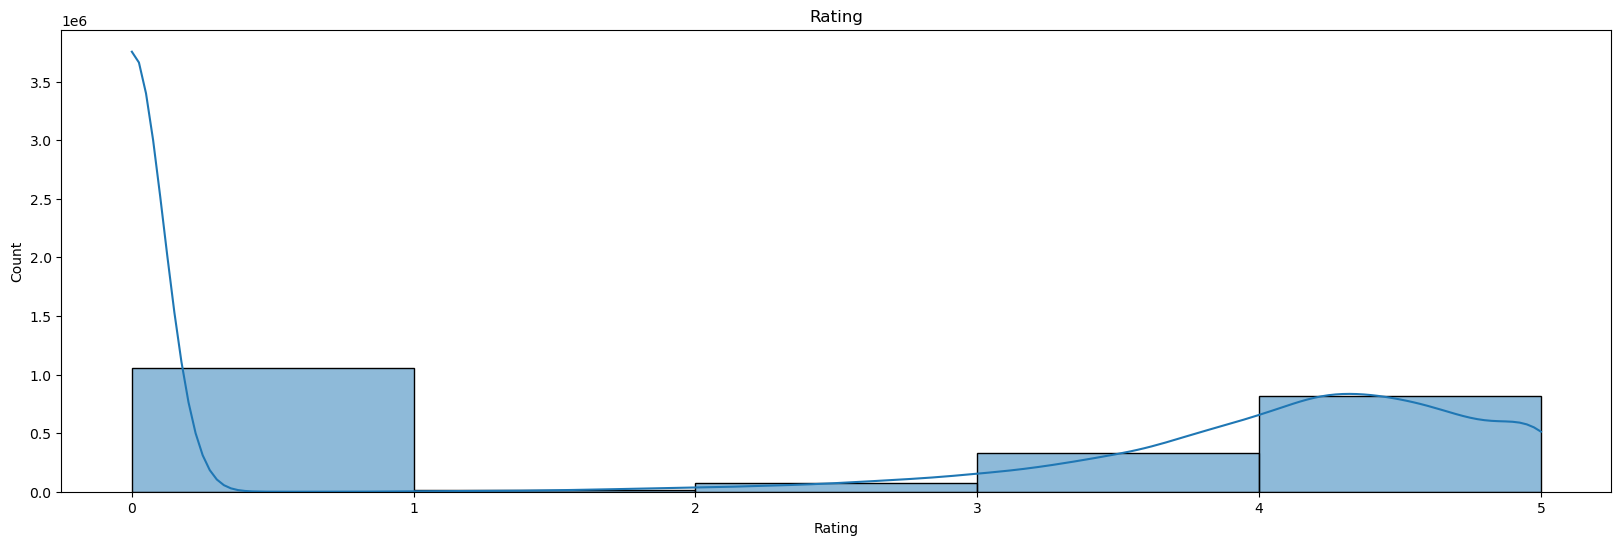

In [63]:
plt.title("Rating")
sns.histplot(dataset.Rating, kde=True, bins=5)

## Observation:
From th above two plots we can see that most people does not give a rating, but one more that comes out from this graph as well is that people tend to give 4+ rating the most

## Q - What is the highest rated Category?

<Axes: title={'center': 'All Categories Rating'}, xlabel='Category', ylabel='Rating'>

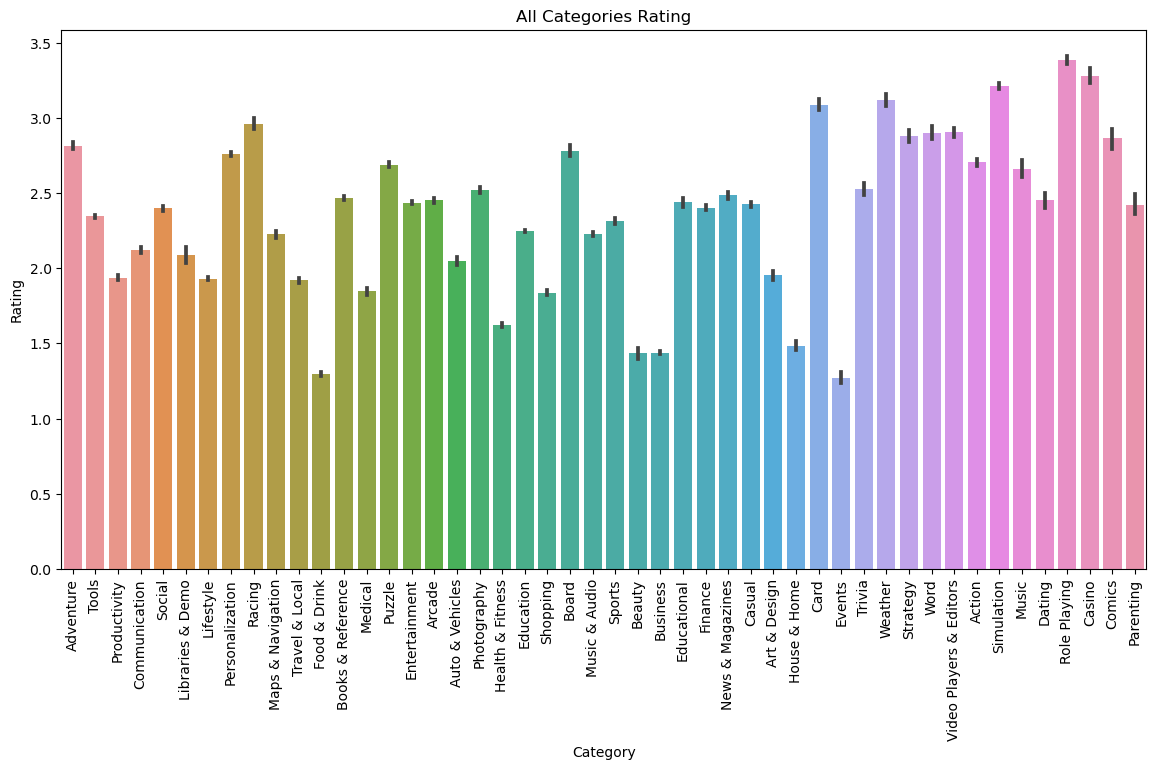

In [64]:
plt.figure(figsize=(14, 7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of Applications")
plt.title("All Categories Rating")
sns.barplot(x = dataset.Category, y = dataset.Rating)

## Answer: From the above plot we can see that Role Playing Category is the highest rated category.

In [65]:
dataset["Content Rating"].unique()

array(['Everyone', 'Teen', 'Adults', 'Adults only 18+'], dtype=object)

<Axes: title={'center': 'Content Rating and Maximum Installations'}, xlabel='Maximum Installs', ylabel='Rating Count'>

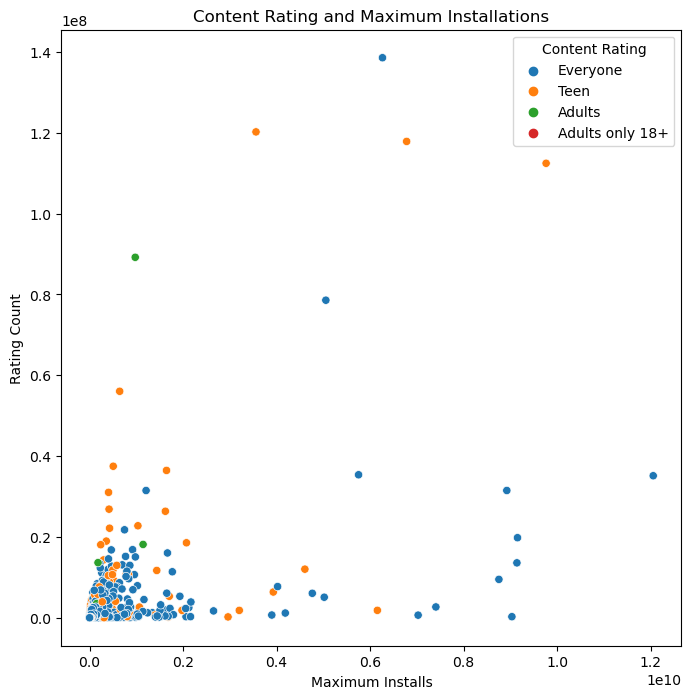

In [66]:
plt.figure(figsize=(8, 8))
plt.title("Content Rating and Maximum Installations")
sns.scatterplot(x="Maximum Installs", y="Rating Count", data=dataset, hue="Content Rating")

## Observation: 
This scatterplot shows us that if we exclude "Everyone" from the plot and when focus on Teen and Adults we can see that teens have much engagement in terms of download and rating count

## Q - Which Category has the highest Paid and Free Apps?

In [67]:
app_count = dataset.groupby(["Category", "Type"])[["App Name"]].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
dataset_app_count = app_count.pivot(values='Count', index='Category', columns='Type').fillna(0).reset_index()

Text(0.5, 1.0, 'Free and Paid Apps in Category')

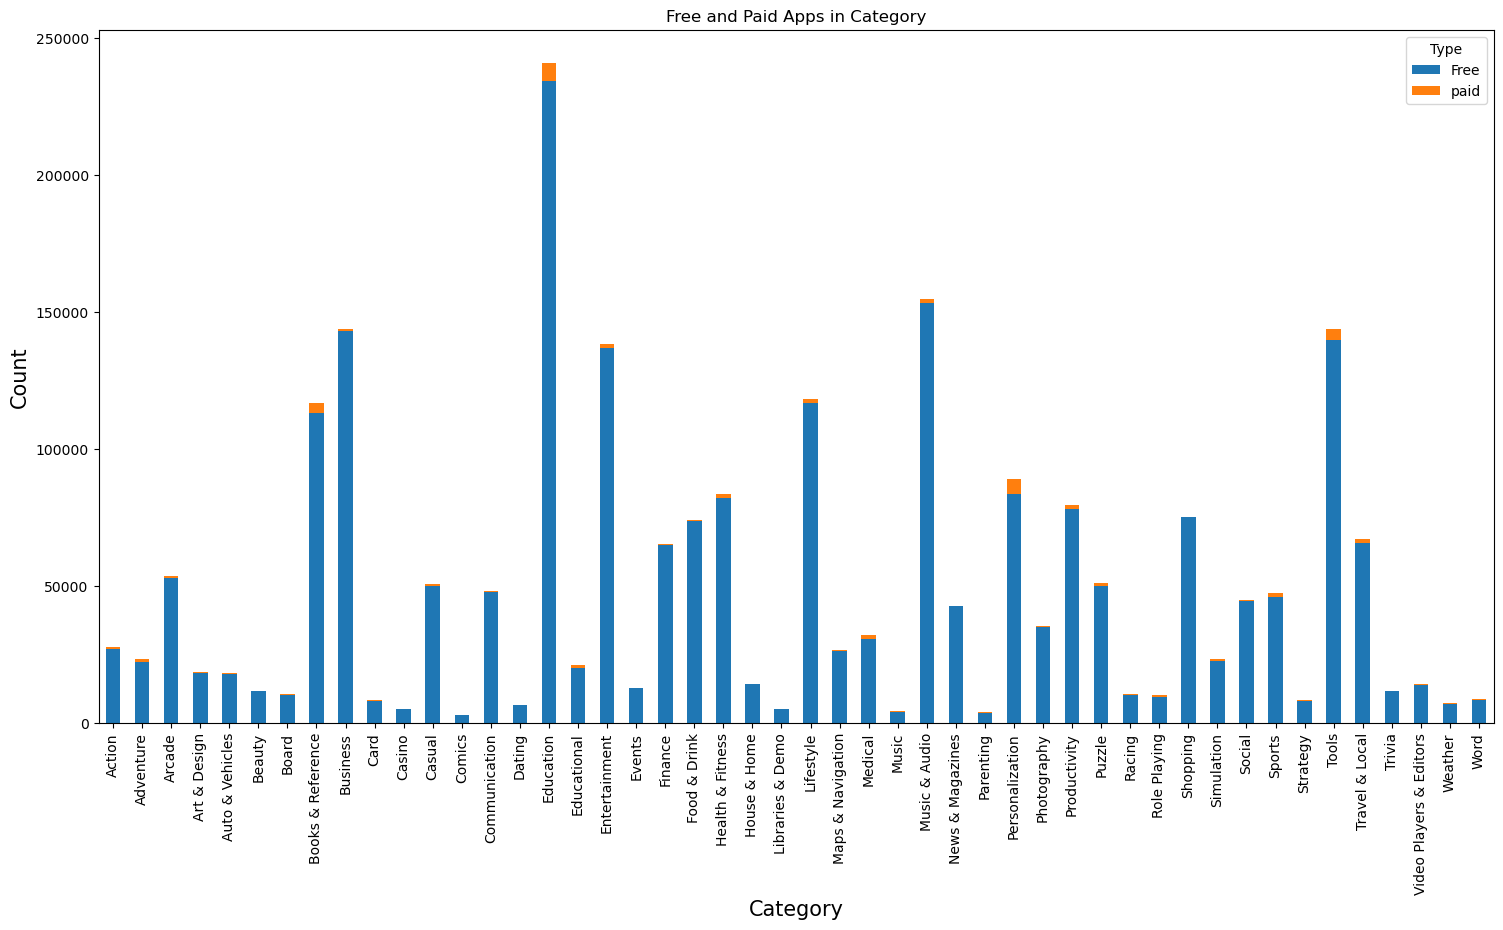

In [68]:
dataset_app_count.set_index("Category").plot(kind = "bar", stacked = True, figsize=(18, 9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

## Answer: 
Education Category is the highest in Paid apps List

## Observation:
It looks like certain apps categories have more free apps available than others. In our dataset, the majority of apps in Business, Education, Music & Audio, Tools as well as Social Categories were free to install. At the same time, Books & References, Education, Tools and Personalization Categories had the biggest number of paid apps available for installation.

## Visualization of the Installation Types in each Category

In [69]:
dataset["Installs"].min(),dataset["Installs"].max()

(0, 10000000000)

### There is a high variance in the number of installs, we need to reduce it so we can use a log value for this column, otherwise it would be unable to see the data when we visualize

In [70]:
category_type_installs = dataset.groupby(["Category", "Type"])[["Installs"]].sum().reset_index()
category_type_installs["log_Installs"] = np.log10(category_type_installs["Installs"])

<Axes: title={'center': 'Number of Installed Apps type wise according to Category'}, xlabel='Category', ylabel='log_Installs'>

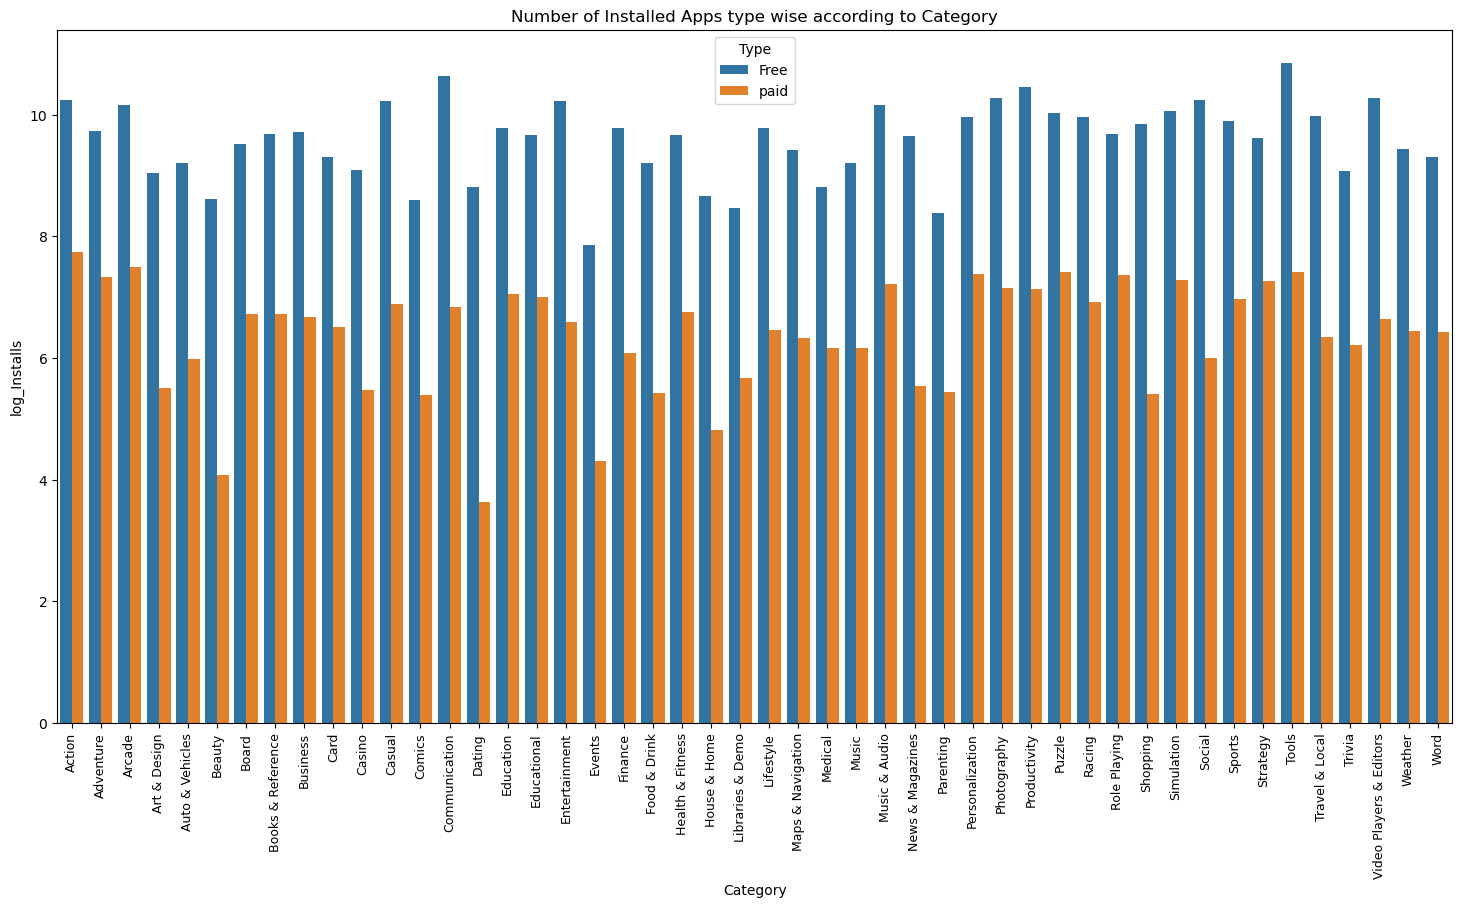

In [71]:
plt.figure(figsize=(18, 9))
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of Installed Apps type wise according to Category")
sns.barplot(x="Category", y="log_Installs", hue="Type", data=category_type_installs)

## Q - How does the size of the Application impacts the installation?

In [72]:
dataset["log_Installs"] = np.log10(category_type_installs["Installs"])

<Axes: title={'center': 'Impact of Application Size in Installation'}, xlabel='Size', ylabel='Installs'>

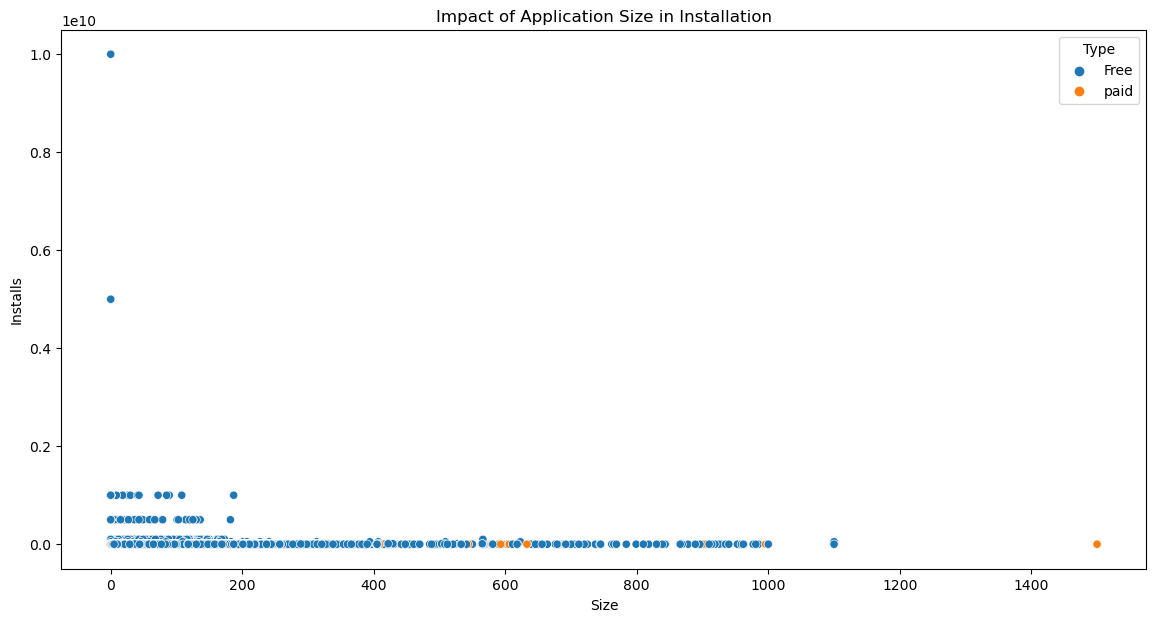

In [73]:
plt.figure(figsize=(14, 7))
plt.xlabel("Size")
plt.ylabel("Installs")
plt.title("Impact of Application Size in Installation")
sns.scatterplot(x="Size", y="Installs", hue="Type", data=dataset)

## Answer:
From the above plot we can see that size impacts the number of installations. Applications with large size are less installed by the user.

## Correlation

## Q - What are the Top 5 Paid Apps based wrt highest rating and Installs?

In [86]:
dataset["Installs"].max()

10000000000

In [95]:
paid_apps = dataset[(dataset.Type=="paid") & (dataset.Installs >= 5000000)]
paid_apps = paid_apps.groupby("App Name")["Rating"].max().sort_values(ascending=False)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

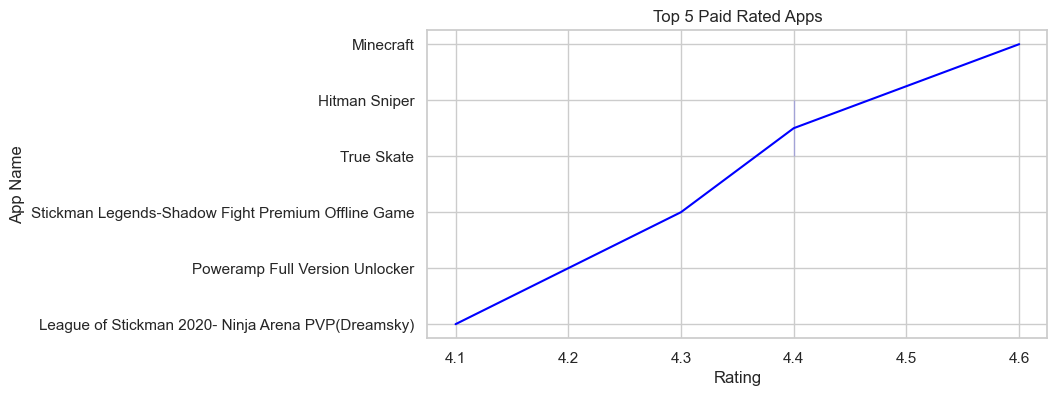

In [96]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values, y=paid_apps.index, color='Blue')

## Ans - Minecraft, Hitman Sniper, True Skate, Stickman Legends - Shadow Fight Premium Offline Game, Poweramp Full Version Unlocker, League of Stickman 2020 - Ninja Arena PVP(Dreamsky)

## Q - What are the Top 5 Free Apps based with highest ratings and Installs?

In [89]:
free_apps = dataset[(dataset.Type=="Free") & (dataset.Installs >= 5000000)]
free_apps = free_apps.groupby("App Name")["Rating"].max().sort_values(ascending=False)
free_apps = free_apps.head(5)

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

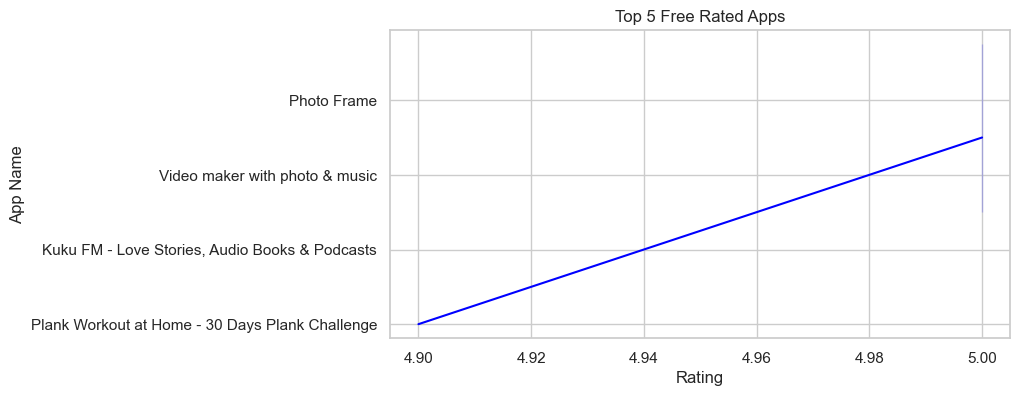

In [90]:
plt.figure(figsize=(8, 4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x=free_apps.values, y=free_apps.index, color = "blue")

## Answer - Photo Frame, Video Maker with Photo & Music, Kuku FM - Love Stories, Audio Books & Podcasts, Plank Workout at Home - 30 Days Plank Challenge

## Visualization the Categories that have the Top 10 Max Installations

Text(0.5, 1.0, 'Top 10 Max Installations Category Wise')

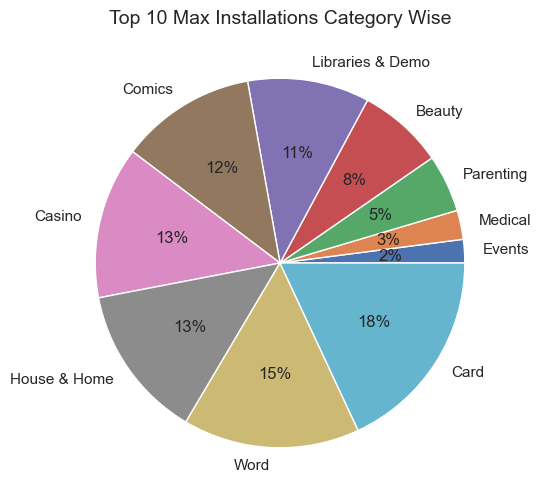

In [97]:
plt.figure(figsize=(8, 6))
data = dataset.groupby("Category")["Maximum Installs"].max().sort_values(ascending=True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels=labels, autopct="%.0f%%")
plt.title("Top 10 Max Installations Category Wise", fontsize=14)

## Visualization of the Top 10 Installed Categories that Adults have Installed the most

In [98]:
dataset["Content Rating"].unique()

array(['Everyone', 'Teen', 'Adults', 'Adults only 18+'], dtype=object)

Text(0.5, 1.0, 'Adults Installing Apps in terms of Category')

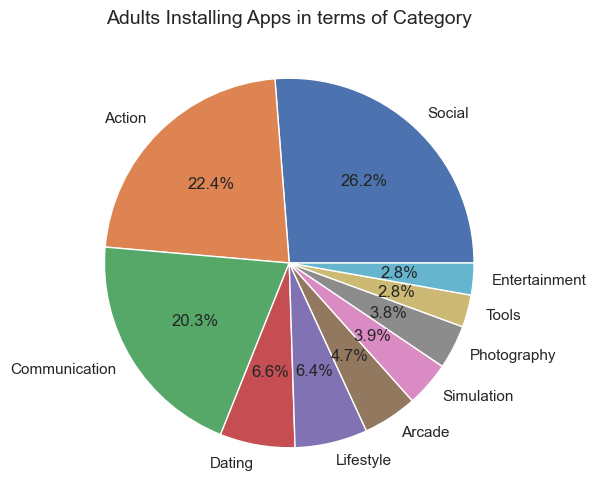

In [101]:
plt.figure(figsize=(8, 6))
Adult = dataset[(dataset["Content Rating"]=="Adults")]
Adult = Adult.groupby(["Category"])["Maximum Installs"].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x=Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing Apps in terms of Category", fontsize = 14)

## Observation:
Most of the Adults showing interest in downloading the Social, Action and Communication Category

## Visualization of Teens Installing the Apps in terms of Category

Text(0.5, 1.0, 'Teen Installing apps in terms of Category')

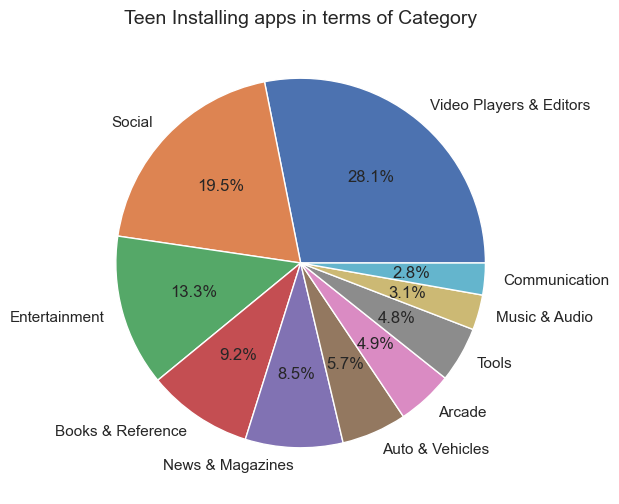

In [103]:
plt.figure(figsize=(8, 6))
Teen = dataset[(dataset["Content Rating"] == "Teen")]
Teen = Teen.groupby(["Category"])["Maximum Installs"].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x=Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of Category", fontsize = 14)

# **Summary and Conclusion** :     
* People are more intrested to install the gaming Apps, the top Rating is given to the gaming apps.
* InAppPurchases are correlated to App rating. So we can say that if the app provides customer support and have subscription plans it will helps to engage customers.
* most people does not gave rating, But the people who are given rating are tend to give 4+ rating the most.
* Most of the Audlts installed the Social and communication Apps. 
* Most of the installations are done by the teens and the most are Video Players and Editors. Video Players and Editors has more demand.
* Size of the Application varies the installations.
* People are mostly dwonladed the free apps the installation of the free apps is high and the availabilty of the free apps also is very high.
 
